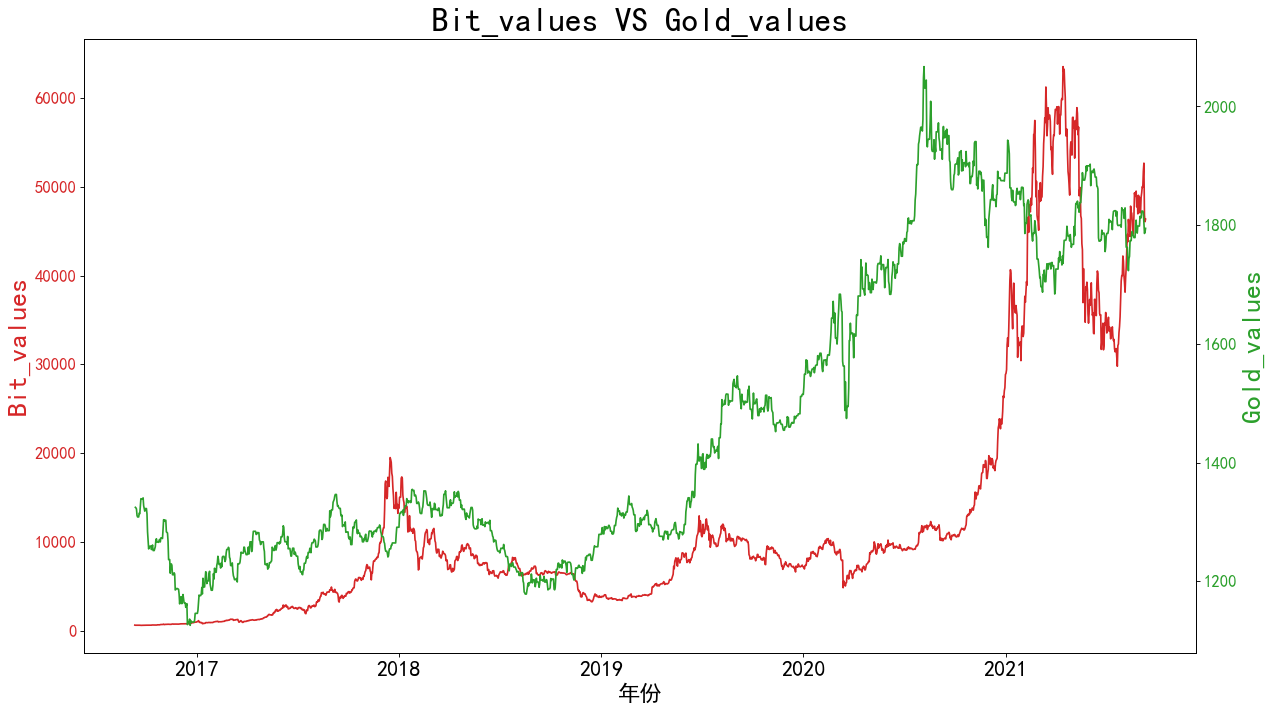

In [49]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

data_gold=pd.read_csv("D:\美赛\LBMA-GOLD.csv",parse_dates=['Date'])
data_bit=pd.read_csv("D:\美赛\BCHAIN-MKPRU.csv",parse_dates=['Date'])

data_merge=data_bit.merge(data_gold,on='Date',how='left')
data_merge.columns=['Date','Bit_values','Gold_values']

data_merge.to_csv('data.csv')
data=data_merge

data = data.fillna(method='pad')


x=data['Date']
y1=data['Bit_values']
y2=data['Gold_values']

#绘制第一条线 (Y轴靠左)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80) #一行一列，只生成一个画布和一个子图
ax1.plot(x, y1, color='tab:red')
#ax1.fill_between(x, y1=y1, y2=0, label='Bit_values', alpha=0.5, color='tab:red', linewidth=2)

#绘制第二条线 (Y轴靠右)
ax2 = ax1.twinx()  #实例化共享相同x轴的第二个轴
ax2.plot(x, y2, color='tab:green')
#ax2.fill_between(x, y1=y2, y2=0, label='Gold_values', alpha=0.5, color='tab:green', linewidth=2)


plt.rcParams['font.sans-serif']=['Simhei'] 
plt.rcParams['axes.unicode_minus']=False


#装饰
ax1.set_xlabel('年份', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=20)

ax1.set_ylabel("Bit_values", color='tab:red', fontsize=25)
ax1.tick_params(axis='y', rotation=0 , labelcolor='tab:red',labelsize=15)

ax2.set_ylabel("Gold_values", color='tab:green', fontsize=25)
ax2.tick_params(axis='y', labelcolor='tab:green',labelsize=15)

ax2.set_title("Bit_values VS Gold_values",fontsize=30)
fig.tight_layout()
plt.show()


In [69]:
#归一化后的数据


import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing

data_gold=pd.read_csv("D:\美赛\LBMA-GOLD.csv",parse_dates=['Date'])
data_bit=pd.read_csv("D:\美赛\BCHAIN-MKPRU.csv",parse_dates=['Date'])

data_merge=data_bit.merge(data_gold,on='Date',how='left')
data_merge.columns=['Date','Bit_values','Gold_values']

data_merge.to_csv('data.csv')
data=data_merge

data = data.fillna(method='pad')

x=data['Date']
y1=data['Bit_values']
y2=data['Gold_values']

max_min_scaler = lambda y1 : (y1-np.min(y1))/(np.max(y1)-np.min(y1))
data[['Bit_values']]=data[['Bit_values']].apply(max_min_scaler)

max_min_scaler2 = lambda y2 : (y2-np.min(y2))/(np.max(y2)-np.min(y2))
data[['Gold_values']]=data[['Gold_values']].apply(max_min_scaler2)
data



,Date,Bit_values,Gold_values
0,2016-09-11,0.000438,NaN
1,2016-09-12,0.000248,0.211270
2,2016-09-13,0.000267,0.210261
3,2016-09-14,0.000234,0.208243
4,2016-09-15,0.000259,0.196612
...,...,...,...
1821,2021-09-06,0.812813,0.739179
1822,2021-09-07,0.827240,0.718519
1823,2021-09-08,0.734035,0.701365
1824,2021-09-09,0.722428,0.703755


In [68]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing

data_gold=pd.read_csv("D:\美赛\LBMA-GOLD.csv",parse_dates=['Date'])
data_bit=pd.read_csv("D:\美赛\BCHAIN-MKPRU.csv",parse_dates=['Date'])

data_merge=data_bit.merge(data_gold,on='Date',how='left')
data_merge.columns=['Date','Bit_values','Gold_values']

data_merge.to_csv('data.csv')
data=data_merge

data = data.fillna(method='pad')

x=data['Date']
y1=data['Bit_values']
y2=data['Gold_values']


y1_scale=preprocessing.scale(y1)
y2_scale=preprocessing.scale(y2)
y1_scale.mean()


-9.33900638457963e-17